# 1.Question C of Problem 1



In [219]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [220]:
import numpy as np 
import matplotlib.pyplot as plt

## Generate Data 

In [221]:
m, n = 100, 50 

rng = np.random.default_rng(seed=42)

A = rng.standard_normal(size=(m, n))

y = rng.standard_normal(size=(m,1))

x = np.zeros((n,1))

## Gradient Descent

In [222]:
func = lambda x : np.linalg.norm(y - A@x) ** 2 
gradient = lambda x: 2 * A.T.dot(A@x - y)
objective_values = [] 
epsilon = 1e-04

In [223]:
k = 0 
while np.linalg.norm(gradient(x)) > epsilon: 
    
    objective_values.append(func(x))
    rho, t, c = rng.random(3)
    while func(x - t* gradient(x)) - func(x) > - c*t* np.linalg.norm(gradient(x))**2: 
        t *= rho 

    x  = x - t*gradient(x)
    k+=1 
    if k % 10 ==0:
        print(f'{k} iter  objection value: {objective_values[-1]}')


10 iter  objection value: 42.526203476201694
20 iter  objection value: 41.69109034698398
30 iter  objection value: 41.599817760333416
40 iter  objection value: 41.591218007404606
50 iter  objection value: 41.59066676717894
60 iter  objection value: 41.59048933441591
70 iter  objection value: 41.590488358362265


## PLOT 

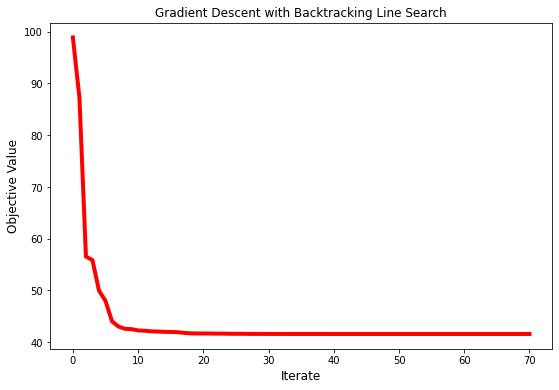

In [224]:
fig, axs = plt.subplots();

axs.plot(objective_values, c='red', linewidth=4)

_ = axs.set_xlabel("Iterate", fontsize=12)
_ = axs.set_ylabel("Objective Value", fontsize=12)
_ = axs.set_title(f"Gradient Descent with Backtracking Line Search")

fig.set_size_inches(9, 6)



# 2.Question F of Problem 1

In [225]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [226]:
m, n = 30, 100

rng = np.random.default_rng(seed=42)

A = rng.standard_normal(size=(m, n))

x0 = rng.binomial(1, 0.2, n)

epsilon = rng.normal(loc=0, scale= 0.5, size=m)

y = A@x0 + epsilon

In [227]:

def loss_fn(x, y, w): 
    return cp.norm2(x@w - y)**2 

def regularizer(w): 
    return cp.norm1(w)


def objective_fn(x, y , w, lambd): 
    return loss_fn(x, y, w) + lambd * regularizer(w)


def mse(x, y , w):
    return (1/ x.shape[0]) * loss_fn(x, y, w).value


In [228]:

w = cp.Variable(n)

lambd = cp.Parameter(nonneg=True)

problem = cp.Problem(cp.Minimize(objective_fn(A, y, w, lambd)))

lambd_values = [1e-2, 10,  1e2]

w_values = []

for v in lambd_values:
    lambd.value = v
    problem.solve()
    w_values.append(w.value)




0.14694708496494002

132.68329414612657

582.4896455697029

<StemContainer object of 3 artists>

<StemContainer object of 3 artists>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, '$\\lambda = 0.01$')

<StemContainer object of 3 artists>

<StemContainer object of 3 artists>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, '$\\lambda = 10$')

<StemContainer object of 3 artists>

<StemContainer object of 3 artists>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, '$\\lambda = 100.0$')

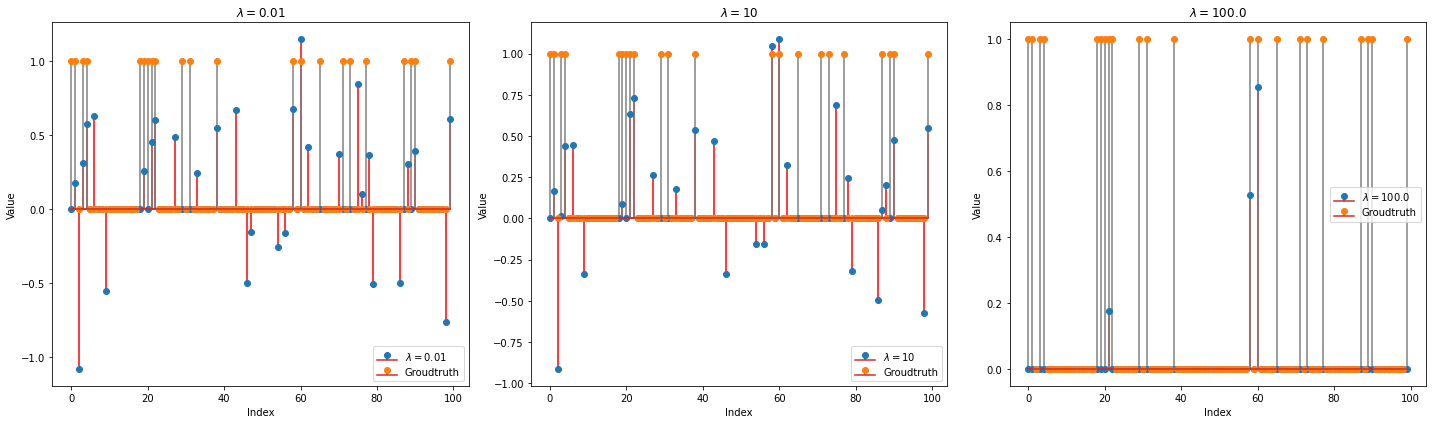

In [229]:
fig, axs = plt.subplots(1,3);
axs = axs.flatten()

for col in range(3): 
    ax = axs[col]
    ax.stem(w_values[col], linefmt='red', markerfmt='o',label=rf'$\lambda = {lambd_values[col]}$',use_line_collection= True)
    ax.stem(x0, linefmt='gray', markerfmt='o',label='Groudtruth',use_line_collection= True)

    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.set_title(f"$\lambda = {lambd_values[col]}$")
    ax.legend() 

fig.set_size_inches(20, 6)
fig.set_tight_layout("pad")

# 3.Question E  of Problem 2

## Gradient Descent

In [230]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler


In [231]:
data, target = load_breast_cancer(return_X_y=True)
X, y = data.astype(np.float128), target.reshape(-1,1).astype(np.float128)
y = np.where(y<1, -1, 1)
std = StandardScaler()
X = std.fit_transform(X)

In [206]:
func = lambda w : np.sum(np.log(1 + np.exp(X@w * -y)))
gradient = lambda w: X.T.dot(1/(np.exp(X@w * y) +1)* -y ) 
objective_values = [] 
epsilon = 1e-2
rng = np.random.default_rng()
w = np.zeros((X.shape[1],1), dtype=np.float128)

In [207]:
k = 0 
while np.linalg.norm(gradient(w)) > epsilon: 
    
    objective_values.append(func(w))
    rho, t, c = rng.random(3)
    while func(w - t* gradient(w)) - func(w) > - c*t* np.linalg.norm(gradient(w))**2: 
        t *= rho 

    w  = w - t*gradient(w)
    k+=1 

    if k % 1000 == 0:
        print(f'{k} iter  objection value: {objective_values[-1]}')

1000 iter  objection value: 17.339443842201096
2000 iter  objection value: 16.748854877341703
3000 iter  objection value: 16.544513711631613
4000 iter  objection value: 16.421607435086987
5000 iter  objection value: 16.33614867809978
6000 iter  objection value: 16.2686259657843
7000 iter  objection value: 16.206861542854465
8000 iter  objection value: 16.150732589538915
9000 iter  objection value: 16.101340733079333
10000 iter  objection value: 16.05164493012981
11000 iter  objection value: 16.003601629460213
12000 iter  objection value: 15.962302239287679
13000 iter  objection value: 15.921376536980953
14000 iter  objection value: 15.878474409442465
15000 iter  objection value: 15.8391426897295
16000 iter  objection value: 15.802276276883495
17000 iter  objection value: 15.76710881674149
18000 iter  objection value: 15.732692133671721
19000 iter  objection value: 15.697702837870015
20000 iter  objection value: 15.663719586743426
21000 iter  objection value: 15.627853318124242
22000 it

In [213]:
np.save('model.npy', w)

## Test and Report Accuracy

In [209]:
from sklearn.metrics import  accuracy_score
accuracy_score(y, np.where(X@w > 0, 1, 0))

0.6274165202108963

## LogisticRegression of Sklearn

In [210]:
from sklearn.linear_model import LogisticRegression

In [211]:
logis  = LogisticRegression(random_state=42).fit(X, y.ravel())

In [212]:
accuracy_score( y, logis.predict(X))

0.9876977152899824

**Built-in logistic regression of sklearn is better than mine based on the accuracy but not many**